In [0]:
import re 
import tweepy 
from tweepy import OAuthHandler 
from textblob import TextBlob 
import matplotlib.pyplot as plt

In [0]:
class TwitterClient(object):
  
    def __init__(self): 
            ''' 
            Class constructor or initialization method. 
            '''
            # keys and tokens from the Twitter Dev Console 
            consumer_key = 'CJ7Ty6zU5GSNXPC7kvNwqRmmE'
            consumer_secret = 'WEayphwLMZZGr7HVdlWXCl6alRk5SmEYuK0brKVZ6MDc5KYoWL'
            access_token = '468385324-bKOkGmb3aVZUjcRuWyUbJiB4ePCXQGv4dwIRNsqu'
            access_token_secret = 'v8Zrg0SHINIorlVMqcpajBCFBovAKj5ucqxKnjxnwa3z0'

            # attempt authentication 
            try: 
                # create OAuthHandler object 
                self.auth = OAuthHandler(consumer_key, consumer_secret) 
                # set access token and secret 
                self.auth.set_access_token(access_token, access_token_secret) 
                # create tweepy API object to fetch tweets 
                self.api = tweepy.API(self.auth) 
            except: 
                print("Error: Authentication Failed") 

    def clean_tweet(self, tweet): 
        
        ''' 
        Utility function to clean tweet text by removing links, special characters 
        using simple regex statements. 
        '''
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", tweet).split()) 
    
    def get_tweet_sentiment(self, tweet): 
        ''' 
        Utility function to classify sentiment of passed tweet 
        using textblob's sentiment method 
        '''
        # create TextBlob object of passed tweet text 
        analysis = TextBlob(self.clean_tweet(tweet)) 
        # set sentiment 
        if analysis.sentiment.polarity > 0: 
            return 'positive'
        elif analysis.sentiment.polarity == 0: 
            return 'neutral'
        else: 
            return 'negative'
    
    def get_tweets(self, query, count = 100): 
        ''' 
        Main function to fetch tweets and parse them. 
        '''
        # empty list to store parsed tweets 
        tweets = [] 
  
        try: 
            # call twitter api to fetch tweets 
            fetched_tweets = self.api.search(q = query, count = count) 
            # parsing tweets one by one 
            for tweet in fetched_tweets: 
                # empty dictionary to store required params of a tweet 
                parsed_tweet = {} 
               # print(tweet.created_at)
                # saving text of tweet 
                parsed_tweet['text'] = tweet.text
                #print(tweet.user.location + "\n")
                #print(tweet.text + "\n")
                #print(tweet.text + "\n")
                # saving sentiment of tweet 
                parsed_tweet['sentiment'] = self.get_tweet_sentiment(tweet.text) 
  
                # appending parsed tweet to tweets list 
                if tweet.retweet_count > 0: 
                    # if tweet has retweets, ensure that it is appended only once 
                    if parsed_tweet not in tweets: 
                        tweets.append(parsed_tweet) 
                else: 
                    tweets.append(parsed_tweet) 
  
            # return parsed tweets 
            return tweets 
  
        except tweepy.TweepError as e: 
            # print error (if any) 
            print("Error : " + str(e)) 

In [0]:
def main(): 
    # creating object of TwitterClient Class 
    api = TwitterClient() 
    # calling function to get tweets 
    tweets = api.get_tweets(query = 'jetblue', count = 200) 
    # picking positive tweets from tweets 
    ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive'] 
    # percentage of positive tweets 
    print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets))) 
    # picking negative tweets from tweets 
    ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative'] 
    # percentage of negative tweets 
    print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets))) 
    # percentage of neutral tweets 
    print("Neutral tweets percentage: {} % \ ".format(100*(len(tweets) - len(ntweets) - len(ptweets))/len(tweets))) 
    explode = (0.1, 0, 0)
    labels = ['Positive', 'Negative', 'Neutral']
    sizes = [100*len(ptweets)/len(tweets), 100*len(ntweets)/len(tweets), 100*(len(tweets) - len(ntweets) - len(ptweets))/len(tweets)]
    colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
    patches, texts = plt.pie(sizes, colors=colors, shadow=True, explode=explode, labels=labels,startangle=140)
    plt.legend(patches, labels, loc="best")
    plt.axis('equal')
    plt.tight_layout()
    plt.show()
  
  
    # printing first 5 positive tweets 
    print("\n\nPositive tweets:") 
    for tweet in ptweets[:10]: 
        print(tweet['text']) 
  
    # printing first 5 negative tweets 
    print("\n\nNegative tweets:") 
    for tweet in ntweets[:10]: 
        print(tweet['text']) 


Positive tweets percentage: 53.40909090909091 %
Negative tweets percentage: 19.318181818181817 %
Neutral tweets percentage: 27.272727272727273 % \ 


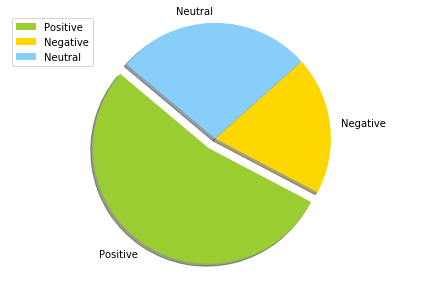



Positive tweets:
@JetBlue .....what a great field trip to take with my family...😑 ..we had to change terminals from C43 to A https://t.co/J27YN4N6zE
Here's another way #airlines are creating a calming atmosphere for a better #flight experience. See on your next fl… https://t.co/8EQ9NqDZp3
Here's another way #airlines are creating a calming atmosphere for a better #flight experience. See on your next fl… https://t.co/LyYgZvtWyW
Really??? They why did they say it was mechanical issues? https://t.co/Sf03qgmyoo
Here's another way #airlines are creating a calming atmosphere for a better #flight experience. See on your next fl… https://t.co/EVAMnQwsRY
Here's another way #airlines are creating a calming atmosphere for a better #flight experience. See on your next fl… https://t.co/GulEAOvVaF
Here's another way #airlines are creating a calming atmosphere for a better #flight experience. See on your next fl… https://t.co/AruHe0rUE9
Here's another way #airlines are creating a calming atmosphere

In [7]:
if __name__ == "__main__": 
    # calling main function 
    main() 